<a href="https://colab.research.google.com/github/Circle-vip/Yandex_practicum/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE_%D1%82%D0%B0%D1%80%D0%B8%D1%84%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D0%BE%D0%BC_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Определение перспективного тарифа для телеком-компании. Проект №4

**Цель:** Проанализировать поведение клиентов и сделать вывод - какой тарифный план выгоднее. 


**Данные:** Выборка из 500 пользавателей двух тарифных планов - "Смарт" и "Ультра" - за 2018 год. Кто они, откуда, каким тарифом пользуются, сколько звонков,  сообщений каждый отправил, и сколько интернета понадобилось.

**Примечание:** «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно:
1) Даже если он длился всего 1 секунду, будет засчитан как 1 минута.

2) Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [ ]:
#Импортируем библиотеки, которые возможно понадобятся
import pandas as pd
import numpy as np
import warnings 
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Чтобы окна об ошибках не мешали
warnings.filterwarnings('ignore')

In [ ]:
#Создали переменные с таблицами
calls = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №4/calls.csv')

internet = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №4/internet.csv')

messages = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №4/messages.csv')

tariffs = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №4/tariffs.csv')

users = pd.read_csv('/content/drive/MyDrive/Яндекс Практикум/Проект №4/users.csv')


In [ ]:
calls.info()

calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
internet.info()

internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
messages.info()

messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
users.info()

users.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
tariffs.info()

tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [ ]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [ ]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [ ]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [ ]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff                   0
dtype: int64

In [ ]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Данный прочитаны, просмотрены на наличие неправильных типов и пропусков. Пропуски обнаружены только в таблице users в столбце churn_date - это пропуск, по причине того, что пользователи на момент взятия выборки пользуются тарифом, поэтому оставлю как есть. Неправильные типы данных поменяю в следующем этапе.

## Подготовка данных

### Звонки

In [ ]:
#Привела данные к нужному типу
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')  

#Создала столбец для номера месяца
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
 
#Округлила время звонка до целого числа вверх, по условиям тарифов(т.к лишние секунды считаются за минуту.)
calls['duration'] = np.ceil(calls['duration']).astype('int')  

#Проверила на анличие дубликатов
calls.duplicated().sum()

0

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,7.158198,1253.940619,8.574067
std,5.959173,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,2.000000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,11.000000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


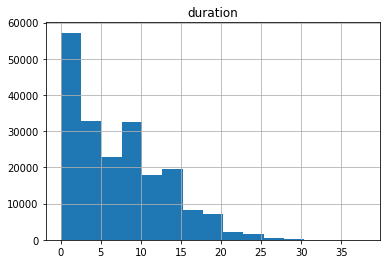

In [ ]:
display(calls.describe())

display(calls.head())

calls.hist('duration', bins=15);

###  Интренет

In [ ]:
#Привожу к типу datetime:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

 #Создала столбец для номера месяца
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 

#Проверила на дубликаты
internet.duplicated().sum()

0

In [ ]:
display(internet.describe())

display(internet.head())

,Unnamed: 0,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842,8.563315
std,43127.054745,278.300951,144.050823,2.788717
min,0.000000,0.000000,1000.000000,1.000000
25%,37348.750000,138.187500,1130.000000,7.000000
50%,74697.500000,348.015000,1251.000000,9.000000
75%,112046.250000,559.552500,1380.000000,11.000000
max,149395.000000,1724.830000,1499.000000,12.000000


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


### Сообщения

In [ ]:
#Привела к типу datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#Создала 2 новых столбца
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 

#проверила на дубликаты
messages.duplicated().sum()

0

In [ ]:
display(messages.head())

display(messages.describe())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000


### Пользователи

In [ ]:
#Привела к типу datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

#Добавила 2 столбца для удобства анализа
users['month'] = pd.DatetimeIndex(users['reg_date']).month 


#Проверка на дубликаты
users.duplicated().sum()

0

In [ ]:
display(users.head())

display(users.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


,user_id,age,month
count,500.000000,500.00000,500.000000
mean,1249.500000,46.58800,6.482000
std,144.481833,16.66763,3.394218
min,1000.000000,18.00000,1.000000
25%,1124.750000,32.00000,4.000000
50%,1249.500000,46.00000,7.000000
75%,1374.250000,62.00000,9.000000
max,1499.000000,75.00000,12.000000


In [ ]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

### Вывод по таблицам:

Данные приведены к корректным типам. Дубликатов и пропусков нет. Из выборки видно, что 351 пользователь на тарифе Smart, и 149 пользователей на Ultra. Заметила также, что есть звонки по 0 минут, что, скорее всего, означает пропущенные звонки.

## Расчет для каждого пользователя: минуты, сообщения, интернет-трафик. По  месяцам.

In [ ]:
#Посчитала кол-во звонков и израсходованных минут для каждого пользователя по месяцам
call_per_month = calls.groupby(['user_id', 'month']).agg(
           calls_duration = pd.NamedAgg(column = 'duration', aggfunc = 'sum'),
           calls_count = ('id', 'count')).reset_index()
call_per_month.sample(10)

,user_id,month,calls_duration,calls_count
1550,1248,10,727,113
2947,1464,9,542,74
2561,1403,9,65,10
186,1029,9,422,57
254,1040,10,287,43
2092,1334,11,116,24
65,1009,5,170,28
1162,1184,10,319,42
782,1124,10,1225,152
1788,1285,9,315,36


In [ ]:
#Посчитала кол-во сообщений по месяцам для каждого пользователя
sms_per_month = messages.groupby(['user_id', 'month']).agg(
      sms_count = pd.NamedAgg(column = 'id', aggfunc = 'count')).reset_index()
sms_per_month.sample(10)

,user_id,month,sms_count
1310,1256,10,103
1474,1284,5,36
1622,1314,3,31
193,1035,4,50
227,1043,12,6
2447,1454,4,30
866,1165,12,224
2627,1482,8,71
1548,1299,12,41
530,1097,6,9


In [ ]:
#Посчитала объем использованного интернет-трафика для каждого пользователя по месяцам
internet_per_month = internet.groupby(['user_id', 'month']).agg(
                mb_count = pd.NamedAgg(column = 'mb_used', aggfunc = 'sum')).reset_index()

#Создала столбец для гигабайтов, который пригодится в дальнейшем
internet_per_month['gb_used'] = np.ceil(internet_per_month['mb_count']/1024).astype('int')    

internet_per_month.sample(10)

,user_id,month,mb_count,gb_used
2417,1381,4,28356.29,28
1375,1216,11,5051.80,5
19,1003,10,14768.14,15
2929,1458,3,13313.08,14
2409,1380,8,33044.80,33
102,1014,7,27823.59,28
2732,1427,5,11682.70,12
1793,1284,8,14037.82,14
2862,1449,9,12617.63,13
2891,1453,11,24046.84,24


### Объединение таблиц

In [ ]:
#Объединила звонки и смс
df = call_per_month.merge(sms_per_month, how='outer', on=['user_id', 'month'])
df.head(1)

,user_id,month,calls_duration,calls_count,sms_count
0,1000,5,159.0,22.0,22.0


In [ ]:
#Добавила интернет_трафик
df = df.merge(internet_per_month, how='outer', on=['user_id', 'month'])
df.head(1)

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used
0,1000,5,159.0,22.0,22.0,2253.49,3.0


In [ ]:
#Заполнила пропуски нулями.
df = df.fillna(0) 

df.head(1)

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used
0,1000,5,159.0,22.0,22.0,2253.49,3.0


In [ ]:
df['user_id'].nunique()  #Не хватает  двух пользователей

498

In [ ]:
#Объединила таблицы с users, так как мне нужны данные: кто каким  тарифом пользуется и города.
df = df.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='right')

df.head(1)

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used,tariff,city
0,1000,5.0,159.0,22.0,22.0,2253.49,3.0,ultra,Краснодар


In [ ]:
#Добавила информацию о тарифах для каждого пользователя. Это мне понадобится для дальнейшего анализа.
df =  df.merge(tariffs[['tariff',
    'rub_monthly_fee',
    'minutes_included',
    'messages_included',
    'mb_per_month_included',
    'rub_per_minute',
    'rub_per_message',
    'rub_per_gb']], on='tariff', how='right')
df.sample(5)

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used,tariff,city,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb
1938,1433,6.0,508.0,68.0,101.0,15385.68,16.0,smart,Подольск,550,500,50,15360,3,3,200
1868,1423,4.0,224.0,29.0,46.0,16933.68,17.0,smart,Астрахань,550,500,50,15360,3,3,200
2425,1104,4.0,297.0,48.0,84.0,15696.86,16.0,ultra,Нижний Тагил,1950,3000,1000,30720,1,1,150
718,1157,9.0,540.0,61.0,0.0,20207.38,20.0,smart,Москва,550,500,50,15360,3,3,200
678,1147,10.0,373.0,47.0,42.0,22329.16,22.0,smart,Якутск,550,500,50,15360,3,3,200


In [ ]:
#Добавила столбец, который показывает сколько гигабайтов включено в тариф
df['gb_per_month_included'] = (df['mb_per_month_included'] / 1024).astype('int')

In [ ]:
len(df['user_id'].unique())   #Пользователей ровно 500 - значит таблица укомплектована корректно.

500

In [ ]:
#Проверяю новый датасет на пропуски
df.isna().sum()

user_id                  0
month                    2
calls_duration           2
calls_count              2
sms_count                2
mb_count                 2
gb_used                  2
tariff                   0
city                     0
rub_monthly_fee          0
minutes_included         0
messages_included        0
mb_per_month_included    0
rub_per_minute           0
rub_per_message          0
rub_per_gb               0
gb_per_month_included    0
dtype: int64

In [ ]:
df['month'] = df['month'].fillna(12) #Пропущенные значения месяцев заменила на последний

In [ ]:
 #Пропущенные значения в звонках, сообщения и месяцах заменила на 0, потому что скорее всего, это просто не использованные тарифы
df = df.fillna(0)  

In [ ]:
df.isna().sum() #перепроверила

user_id                  0
month                    0
calls_duration           0
calls_count              0
sms_count                0
mb_count                 0
gb_used                  0
tariff                   0
city                     0
rub_monthly_fee          0
minutes_included         0
messages_included        0
mb_per_month_included    0
rub_per_minute           0
rub_per_message          0
rub_per_gb               0
gb_per_month_included    0
dtype: int64

In [ ]:
df.head()  #Проверила как выглядит

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used,tariff,city,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb,gb_per_month_included
0,1001,11.0,430.0,59.0,0.0,18429.34,18.0,smart,Москва,550,500,50,15360,3,3,200,15
1,1001,12.0,414.0,63.0,0.0,14036.66,14.0,smart,Москва,550,500,50,15360,3,3,200,15
2,1002,6.0,117.0,15.0,4.0,10856.82,11.0,smart,Стерлитамак,550,500,50,15360,3,3,200,15
3,1002,7.0,214.0,26.0,11.0,17580.10,18.0,smart,Стерлитамак,550,500,50,15360,3,3,200,15
4,1002,8.0,289.0,42.0,13.0,20319.26,20.0,smart,Стерлитамак,550,500,50,15360,3,3,200,15


### Вывод:

Получилась таблица, в которой я объединила данные с расчетами по месяцам для каждого пользователя, а также информация о тарифах для каждого пользователя. Эта таблица мне понадобится для дальнейшего анализа. Обнаружились пропуски в столбцах с смс, звонками, интернет-трафиком - предполагаю, что тарифом не пользовались, после подключения. Добавила колонку с гигабайтами включеными в тариф, т.к расчет выплаты по тарифу и сверх тарифа идет по гигабайтам, а не мегабайтам.

## Расчет выручки.

In [ ]:
#Создала функцию для подсчета выручки:
def proceeds(row):
    fare = row.rub_monthly_fee
    if (row.calls_duration > row.minutes_included):
        fare += (row.calls_duration - row.minutes_included) * row.rub_per_minute
    if (row.sms_count > row.messages_included):
        fare += (row.sms_count - row.messages_included) * row.rub_per_message
    if (row.gb_used > row.gb_per_month_included):
        fare += (row.gb_used - row.gb_per_month_included) * row.rub_per_gb
    return fare

In [ ]:
#Добавила колонку, в которой будет посчитана выручка с пользователя за месяц
df['revenue'] = df.apply(proceeds, axis=1)

In [ ]:
#Поменяла типы данных на корректные
df['month'] = df['month'].astype('int')
df['calls_duration'] = df['calls_duration'].astype('int')
df['sms_count'] = df['sms_count'].astype('int')
df['mb_count'] = df['mb_count'].astype('int')
df['gb_used'] = df['gb_used'].astype('int')
df['calls_count'] = df['calls_count'].astype('int')

In [ ]:
df.sample(10)  #Проверила как выглядит

,user_id,month,calls_duration,calls_count,sms_count,mb_count,gb_used,tariff,city,rub_monthly_fee,minutes_included,messages_included,mb_per_month_included,rub_per_minute,rub_per_message,rub_per_gb,gb_per_month_included,revenue
3167,1469,8,779,114,0,33038,33,ultra,Сочи,1950,3000,1000,30720,1,1,150,30,2400.0
2643,1240,11,383,53,0,32581,32,ultra,Воронеж,1950,3000,1000,30720,1,1,150,30,2250.0
2512,1156,11,119,17,2,7041,7,ultra,Набережные Челны,1950,3000,1000,30720,1,1,150,30,1950.0
2134,1480,9,305,58,19,13639,14,smart,Новокузнецк,550,500,50,15360,3,3,200,15,550.0
2192,1490,10,312,42,45,20664,21,smart,Москва,550,500,50,15360,3,3,200,15,1750.0
1973,1441,12,182,23,38,26186,26,smart,Самара,550,500,50,15360,3,3,200,15,2750.0
2332,1063,8,864,129,0,13866,14,ultra,Тула,1950,3000,1000,30720,1,1,150,30,1950.0
1263,1278,12,663,85,64,22592,23,smart,Новокузнецк,550,500,50,15360,3,3,200,15,2681.0
1821,1413,10,193,25,4,26911,27,smart,Новосибирск,550,500,50,15360,3,3,200,15,2950.0
666,1145,12,524,79,105,12405,13,smart,Тюмень,550,500,50,15360,3,3,200,15,787.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3216 non-null   int64  
 2   calls_duration         3216 non-null   int64  
 3   calls_count            3216 non-null   int64  
 4   sms_count              3216 non-null   int64  
 5   mb_count               3216 non-null   int64  
 6   gb_used                3216 non-null   int64  
 7   tariff                 3216 non-null   object 
 8   city                   3216 non-null   object 
 9   rub_monthly_fee        3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  messages_included      3216 non-null   int64  
 12  mb_per_month_included  3216 non-null   int64  
 13  rub_per_minute         3216 non-null   int64  
 14  rub_per_message        3216 non-null   int64  
 15  rub_

### Вывод:

Учла подсчет перерасхода интернета - перевела мегабайты в гигабайты и округлила вверх. Тоже самое с минутами - округлила вверх.

Расчеты произведены корректно. 

Пропуски устранены.

Данные приведены к нужным типам. 

## Анализ данных

In [ ]:
#Пользователи тарифа Smart
smart = df.query('tariff == "smart"')

#Пользователи тарифа Ultra
ultra = df.query('tariff == "ultra"')

Сравнение тарифов СМАРТ и УЛЬТРА по звонкам


,count,mean,std,min,25%,50%,75%,max,var
tariff,,,,,,,,,
smart,2230.0,417.747534,190.476754,0.0,282.0,421.5,545.00,1435.0,36281.393836
ultra,986.0,526.089249,317.887549,0.0,282.5,518.0,751.75,1673.0,101052.493549


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ecdcab10>]],
      dtype=object)

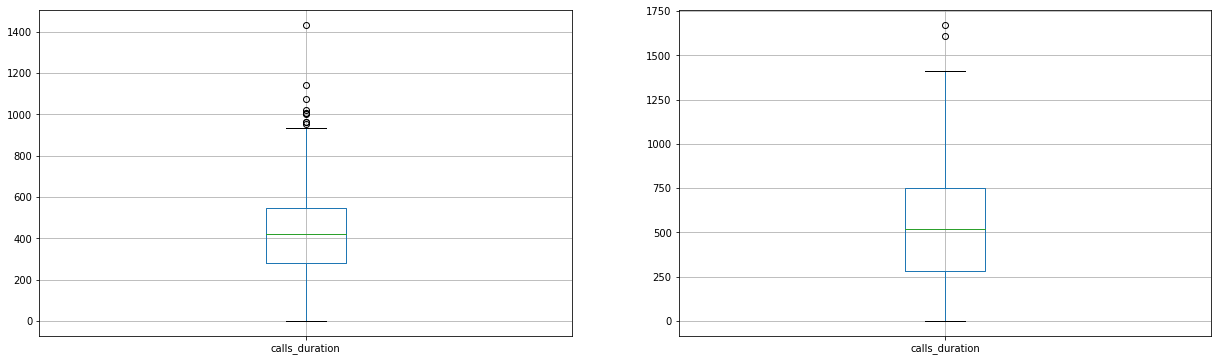

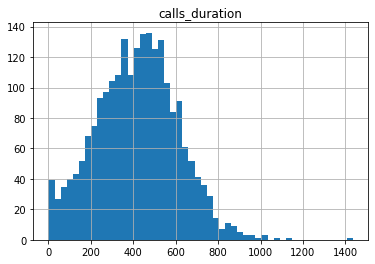

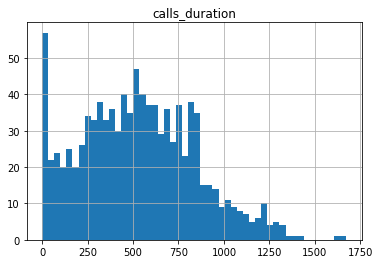

In [ ]:
print('Сравнение тарифов СМАРТ и УЛЬТРА по звонкам')
cd = df.groupby(df.tariff)['calls_duration']
cd_tab=cd.describe()
cd_tab['var'] = [np.var(cd.get_group('smart'), ddof=1), np.var(cd.get_group('ultra'), ddof=1)]
display(cd_tab)

fig = plt.figure(figsize=(21,6))
smart.boxplot('calls_duration', ax=plt.subplot(1,2,1))
ultra.boxplot('calls_duration', ax=plt.subplot(1,2,2))

smart.hist('calls_duration', bins=50)
ultra.hist('calls_duration', bins=50)

### Вывод между тарифами по сообщениям:

1) У пользователей обоих тарифов наблюдается большой процент не использованных смс. Это можно объяснить, например, мессенджерами.

2) Пользователи Смарт  часто выходят за рамки  лимита(50 смс)

3) Пользователи Ультра напротив - не выходят за рамки лимита(1000 смс) и редко добираются даже до половины.

Сравнение тарифов СМАРТ и УЛЬТРА по объему интеренет-трафика


,count,mean,std,min,25%,50%,75%,max,var
tariff,,,,,,,,,
smart,2230.0,16.321525,5.756167,0.0,13.0,17.0,20.0,38.0,33.133453
ultra,986.0,19.474645,9.868057,0.0,12.0,19.0,27.0,49.0,97.378544


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2ecad40d0>]],
      dtype=object)

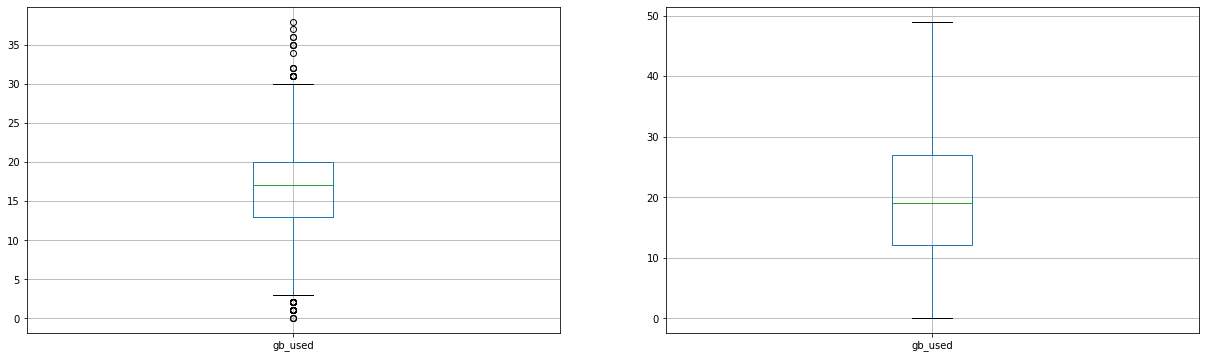

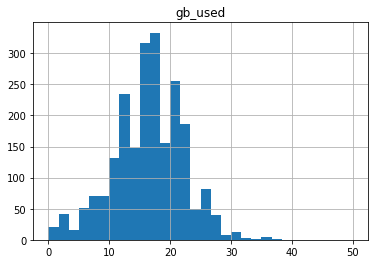

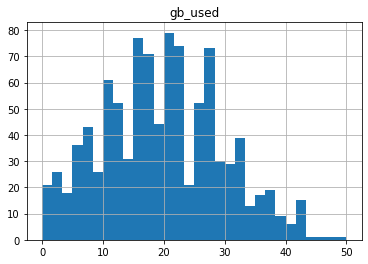

In [ ]:
print('Сравнение тарифов СМАРТ и УЛЬТРА по объему интеренет-трафика')
gb = df.groupby(df.tariff)['gb_used']
gb_tab = gb.describe()
gb_tab['var'] = [np.var(gb.get_group('smart'), ddof=1), np.var(gb.get_group('ultra'), ddof=1)]
display(gb_tab)

fig = plt.figure(figsize=(21,6))
smart.boxplot('gb_used', ax=plt.subplot(1,2,1))
ultra.boxplot('gb_used', ax=plt.subplot(1,2,2))

smart.hist('gb_used', bins=30, range=(0, 50))
ultra.hist('gb_used', bins=30, range=(0, 50))

In [ ]:
print('Пользователи SMART:')
print('Используют в среднем минут:', smart['calls_duration'].mean())
print('Используют в среднем сообщений:', smart['sms_count'].mean())
print('Используют в среднем гигабайтов:', smart['gb_used'].mean())

print('Пользователи ULTRA:')
print('Используют в среднем минут:', ultra['calls_duration'].mean())
print('Используют в среднем сообщений:', ultra['sms_count'].mean())
print('Используют в среднем гигабайтов:', ultra['gb_used'].mean())

Пользователи SMART:
Используют в среднем минут: 417.747533632287
Используют в среднем сообщений: 33.36905829596412
Используют в среднем гигабайтов: 16.32152466367713
Пользователи ULTRA:
Используют в среднем минут: 526.0892494929006
Используют в среднем сообщений: 49.31338742393509
Используют в среднем гигабайтов: 19.474645030425965


### Вывод между тарифами по интернет-трафику:

1) Пользователи Смарт часто выходят из лимита по гигабайтам (15гб) и доплачивают за перерасход. Среднее равно 16 гб.

2) Пользователи Ультра выходят из лимита реже.

3) Кол-во неиспользованных гигабайтов присутсвует в обоих тарифах, но все же, этот процент значительно меньше, чем в ситуации с минутами и смс. Значит пользователям зачастую больше нужен интерент, чем смс и звонки. 


In [ ]:
#Общая выручка по тарифам
revenue = df.groupby('tariff')['revenue'].sum()

revenue

tariff
smart    2875901.0
ultra    2041050.0
Name: revenue, dtype: float64

In [ ]:
revenue = df.groupby('tariff')['revenue'].mean()
revenue

tariff
smart    1289.641704
ultra    2070.030426
Name: revenue, dtype: float64

## Проверка гипотез.

**Первая нулевая гипотеза:**
Средняя выручка пользователей тарифов "Ультра" И "Смарт" равны.


**Альтернативная гипотеза:**
Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.


In [ ]:
sample_1 = smart['revenue']
sample_2 = ultra['revenue']
print('cреднее Smart: ', sample_1.mean())
print('cреднее Ultra: ', sample_2.mean())


results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

cреднее Smart:  1289.6417040358745
cреднее Ultra:  2070.030425963489
p-value: 8.081909555489933e-161
Принимаем альтернативную гипотезу


### Вывод:

Можно сказать, что средняя выручка по двум тарифам различается.
p-value меньше статистической значимости(5%), а это значит, что вероятность случайного совпадения средних наших выборок очень мала. Поэтому принимаем альтернативную гипотезу.

**Вторая нулевая гипотеза:**
Средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.

**Альтернативная гипотеза**
Средня выручка пользователей из Москвы отличается от средней выручки пользователей из регионов.

In [ ]:
moscow = df.query('city == "Москва"')['revenue']
others = df.query('city != "Москва"')['revenue']

print('Средняя выручка по Москве:', moscow.mean())
print('Средняя выручка по регионам:', others.mean())

alpha = .05

results = st.ttest_ind(moscow, others)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя выручка по Москве: 1546.7135842880523
Средняя выручка по регионам: 1524.7251439539348
p-value: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


### Вывод:

Средняя выручка по Москве достаточно близка к среднему по другим городам. p-value говорит нам о том, что вероятность совпадения средних этих выборок достаточно существенная. Поэтому мы не можем отвергать нулевую гипотезу.

## Итоговый вывод:

1) Самым прибильным сегментом является интернет, в обоих тарифах.

2) Пользователи Smart чаще не укладываются в лимиты и намного превышают их.

3) Пользователи Ultra практически не превышают лимитов, кроме лимита интернета.

4) В двух тарифах довольно много пользователей не пользуются отправкой сообщенийи и минутами разговора. И в обоих очень маленький процент людей не пользуется интернетом.

5) Пользователи Ultra чаще всего не используют весь лимит по звонкам и сообщениям.

6) Среднняя выручка выше у Ultra, хотя в выборке пользователей Ultra в 2 раза меньше, чем пользователей Smart.

7) Разница в средней вырчки из Москвы и других регонов - незначительная.

8) В целом,  больше выручки принес тариф Smart. Средняя выручка по тарифу Smart ~1289р, а по   тарифу Ultra ~2070.  Так что делаю вывод, что тариф Ultra выгоднее.

**Рекомендации:**
Стоит существенно сократить лимиты по сообщениям и минутам в тарифе Ultra. 
Увеличить лимит по интернету, т.к это самый используемый сегмент.
Увеличить лимит по минутам в тарифе Smart.
